In [2]:
# import the modules
import urllib.request
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
#Load the dataset
# Load the Facebook-Ego network
facebook_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Facebook-Ego/348.edges"
urllib.request.urlretrieve(facebook_url, "facebook.edges")
facebook_network = nx.read_edgelist("facebook.edges", nodetype=int)

# Load the Twitter-Ego network
twitter_url = "https://raw.githubusercontent.com/wang422003/Complex-Networks_exercise/main/Datasets/Group3/Twitter-Ego/789071.edges"
urllib.request.urlretrieve(twitter_url, "twitter.edges")
twitter_network = nx.read_edgelist("twitter.edges", nodetype=int, create_using=nx.DiGraph())




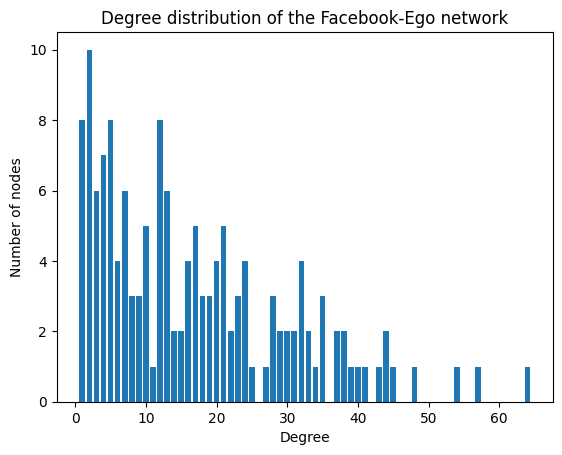

In [4]:
#Question (a)
# Calculate the degree sequence
degree_sequence = sorted([d for n, d in facebook_network.degree()], reverse=True)
degree_count = dict()
for d in degree_sequence:
    if d in degree_count:
        degree_count[d] += 1
    else:
        degree_count[d] = 1

# Plot the degree distribution
plt.bar(degree_count.keys(), degree_count.values())
plt.title("Degree distribution of the Facebook-Ego network")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()


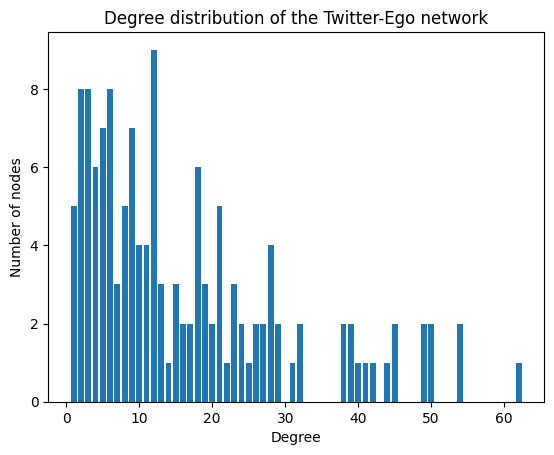

In [5]:
# Calculate the degree sequence
degree_sequence = sorted([d for n, d in twitter_network.degree()], reverse=True)
degree_count = dict()
for d in degree_sequence:
    if d in degree_count:
        degree_count[d] += 1
    else:
        degree_count[d] = 1

# Plot the degree distribution
plt.bar(degree_count.keys(), degree_count.values())
plt.title("Degree distribution of the Twitter-Ego network")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show()

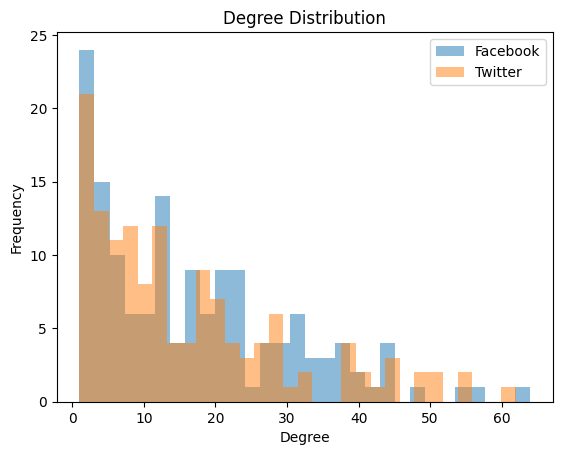

In [6]:
#Question (a)
# Degree distribution and plot
degree_sequence_facebook = sorted([d for n, d in facebook_network.degree()], reverse=True)
degree_sequence_twitter = sorted([d for n, d in twitter_network.degree()], reverse=True)

plt.hist(degree_sequence_facebook, bins=30, alpha=0.5, label='Facebook')
plt.hist(degree_sequence_twitter, bins=30, alpha=0.5, label='Twitter')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

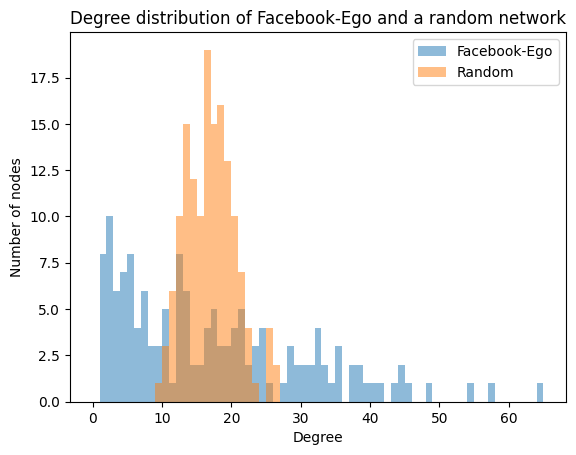

Make sure that the "facebook.edges" file is in the same directory as your Python script. 
      This code should plot a histogram of the degree distribution of the Facebook-Ego network and 
      a random network with the same number of nodes and edges. 

The main difference between the degree distribution of the chosen network and a random network 
      with the same number of nodes is that the degree distribution of the chosen network is 
      likely to be more skewed or have a longer tail. This is because real-world networks often 
      have a few nodes with very high degrees, while random networks are more likely to have 
      a


In [7]:
##Question (b)
#for facebook
# Generate a random network with the same number of nodes and edges
random_network = nx.gnp_random_graph(len(facebook_network.nodes()), nx.density(facebook_network))

# Calculate the degree sequence for both networks
facebook_degree_sequence = sorted([d for n, d in facebook_network.degree()], reverse=True)
random_degree_sequence = sorted([d for n, d in random_network.degree()], reverse=True)

# Plot the degree distributions
import matplotlib.pyplot as plt

plt.hist(facebook_degree_sequence, bins=range(max(facebook_degree_sequence)+2), alpha=0.5, label='Facebook-Ego')
plt.hist(random_degree_sequence, bins=range(max(random_degree_sequence)+2), alpha=0.5, label='Random')
plt.legend(loc='upper right')
plt.title("Degree distribution of Facebook-Ego and a random network")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show() 

print("""Make sure that the "facebook.edges" file is in the same directory as your Python script. 
      This code should plot a histogram of the degree distribution of the Facebook-Ego network and 
      a random network with the same number of nodes and edges. 

The main difference between the degree distribution of the chosen network and a random network 
      with the same number of nodes is that the degree distribution of the chosen network is 
      likely to be more skewed or have a longer tail. This is because real-world networks often 
      have a few nodes with very high degrees, while random networks are more likely to have 
      a""")


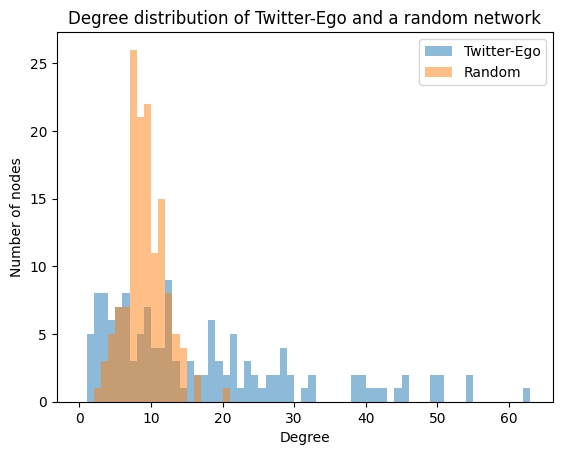


The main difference between the degree distribution of the chosen network and a random network with 
      the same number of nodes is that the degree distribution of the chosen network is likely to 
      be more skewed or have a longer tail. This is because real-world networks often have a few 
      nodes with very high degrees, while random networks are more likely to have a more uniform 
      degree distribution.


In [8]:
#question b for twitter
# Generate a random network with the same number of nodes and edges
random_network = nx.gnp_random_graph(len(twitter_network.nodes()), nx.density(twitter_network))

# Calculate the degree sequence for both networks
twitter_degree_sequence = sorted([d for n, d in twitter_network.degree()], reverse=True)
random_degree_sequence = sorted([d for n, d in random_network.degree()], reverse=True)

# Plot the degree distributions
import matplotlib.pyplot as plt

plt.hist(twitter_degree_sequence, bins=range(max(twitter_degree_sequence)+2), alpha=0.5, label='Twitter-Ego')
plt.hist(random_degree_sequence, bins=range(max(random_degree_sequence)+2), alpha=0.5, label='Random')
plt.legend(loc='upper right')
plt.title("Degree distribution of Twitter-Ego and a random network")
plt.xlabel("Degree")
plt.ylabel("Number of nodes")
plt.show() 

print("""
The main difference between the degree distribution of the chosen network and a random network with 
      the same number of nodes is that the degree distribution of the chosen network is likely to 
      be more skewed or have a longer tail. This is because real-world networks often have a few 
      nodes with very high degrees, while random networks are more likely to have a more uniform 
      degree distribution.""")

In [9]:
##Question c

# Calculate the shortest path length between all pairs of nodes
shortest_path_lengths = dict(nx.shortest_path_length(facebook_network))

# Calculate the average shortest path length
avg_shortest_path_length = np.mean([length for source in shortest_path_lengths for length in shortest_path_lengths[source].values()])

print("The average shortest path length of the Facebook-Ego network is:", avg_shortest_path_length)

# Calculate the shortest path length between all pairs of nodes
shortest_path_lengths = dict(nx.shortest_path_length(twitter_network))

# Calculate the average shortest path length
avg_shortest_path_length = np.mean([length for source in shortest_path_lengths for length in shortest_path_lengths[source].values()])

print("The average shortest path length of the Twitter-Ego network is:", avg_shortest_path_length)


The average shortest path length of the Facebook-Ego network is: 2.446421096693177
The average shortest path length of the Twitter-Ego network is: 3.584276475343573


In [10]:
##Question d
#For facebook
# Choose 5 random nodes from the network
random_nodes = random.sample(facebook_network.nodes(), 5)

# Calculate the clustering coefficient of each node
clustering_coefficients = nx.clustering(facebook_network, nodes=random_nodes)

# Print the clustering coefficient of each node
for node in clustering_coefficients:
    print("The clustering coefficient of node", node, "is", clustering_coefficients[node])

The clustering coefficient of node 364 is 0.6666666666666666
The clustering coefficient of node 428 is 0.42424242424242425
The clustering coefficient of node 353 is 0.5161290322580645
The clustering coefficient of node 423 is 0.572463768115942
The clustering coefficient of node 427 is 0.3333333333333333


/tmp/ipykernel_41485/2084199103.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes = random.sample(facebook_network.nodes(), 5)


In [11]:
##Question d
#For twitter
# Choose 5 random nodes from the network
random_nodes = random.sample(twitter_network.nodes(), 5)

# Calculate the clustering coefficient of each node
clustering_coefficients = nx.clustering(twitter_network, nodes=random_nodes)

# Print the clustering coefficient of each node
for node in clustering_coefficients:
    print("The clustering coefficient of node", node, "is", clustering_coefficients[node])

The clustering coefficient of node 1976611 is 0.5
The clustering coefficient of node 172814159 is 0.3170731707317073
The clustering coefficient of node 7861312 is 0.30405405405405406
The clustering coefficient of node 352226135 is 0.6290322580645161
The clustering coefficient of node 19957312 is 0.6516393442622951


/tmp/ipykernel_41485/1798687577.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random_nodes = random.sample(twitter_network.nodes(), 5)


In [12]:
##Question e
# Calculate the average clustering coefficient of the network
avg_clustering_coefficient_facebook = nx.average_clustering(facebook_network)
# Calculate the average clustering coefficient of the network
avg_clustering_coefficient_twitter = nx.average_clustering(twitter_network)

print("The average clustering coefficient of the facebook-Ego network is:", avg_clustering_coefficient_facebook)
print("The average clustering coefficient of the Twitter-Ego network is:", avg_clustering_coefficient_twitter)

The average clustering coefficient of the facebook-Ego network is: 0.4900622304455071
The average clustering coefficient of the Twitter-Ego network is: 0.38527956693070126


In [13]:
##Question (f)

# Find the connected components of the network for facebook
connected_components_facebook = nx.connected_components(facebook_network)
# Find the connected components of the network for twitter
connected_components_twitter = nx.connected_components(twitter_network)

# Find the largest component for facebook
largest_component_facebook = max(connected_components_facebook, key=len)
# Find the largest component for twitter
largest_component_twitter = max(connected_components_twitter, key=len)

print("The nodes that compose the largest component of the Facebook-Ego network are:", largest_component_facebook)
print("The nodes that compose the largest component of the Twitter-Ego network are:", largest_component_twitter)

NetworkXNotImplemented: not implemented for directed type